In [ ]:
import pandas as pd

In [ ]:
credit=pd.read_csv('/content/german_credit_data (1).csv', index_col=0)
credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
credit.head()
# del credit['Unnamed: 0']

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams['figure.figsize']=(10,6)

In [ ]:
numerical_credit=credit.select_dtypes(exclude='O')

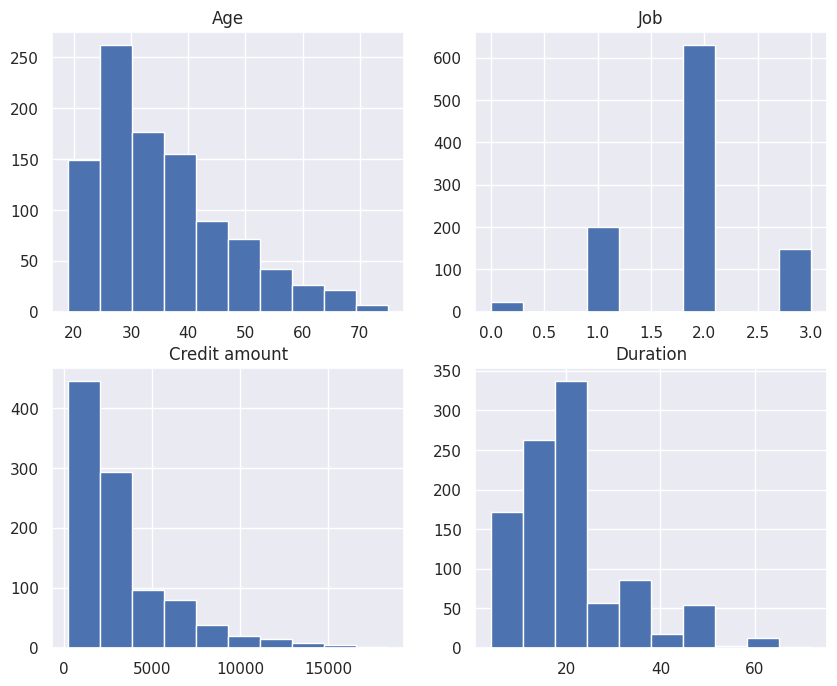

In [ ]:
plt.figure(figsize=(10,8))
k=0
cols=numerical_credit.columns
for i, j in zip(range(len(cols)),cols):
    k+=1
    plt.subplot(2,2,k)
    plt.hist(numerical_credit.iloc[:,i])
    plt.title(j)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
scaler=StandardScaler()
scaled_credit=scaler.fit_transform(numerical_credit)

In [ ]:
distance=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(scaled_credit)
    distance.append(kmeans.inertia_)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

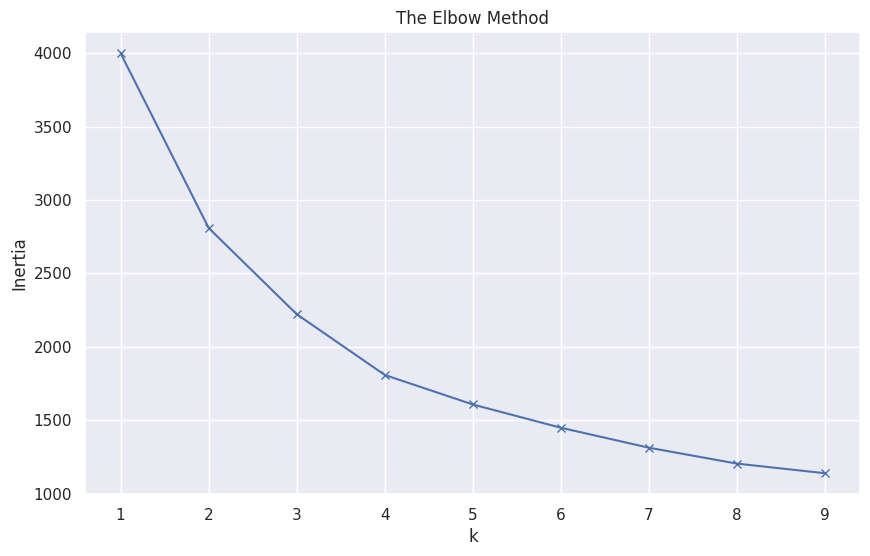

In [ ]:
plt.plot(range(1,10), distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

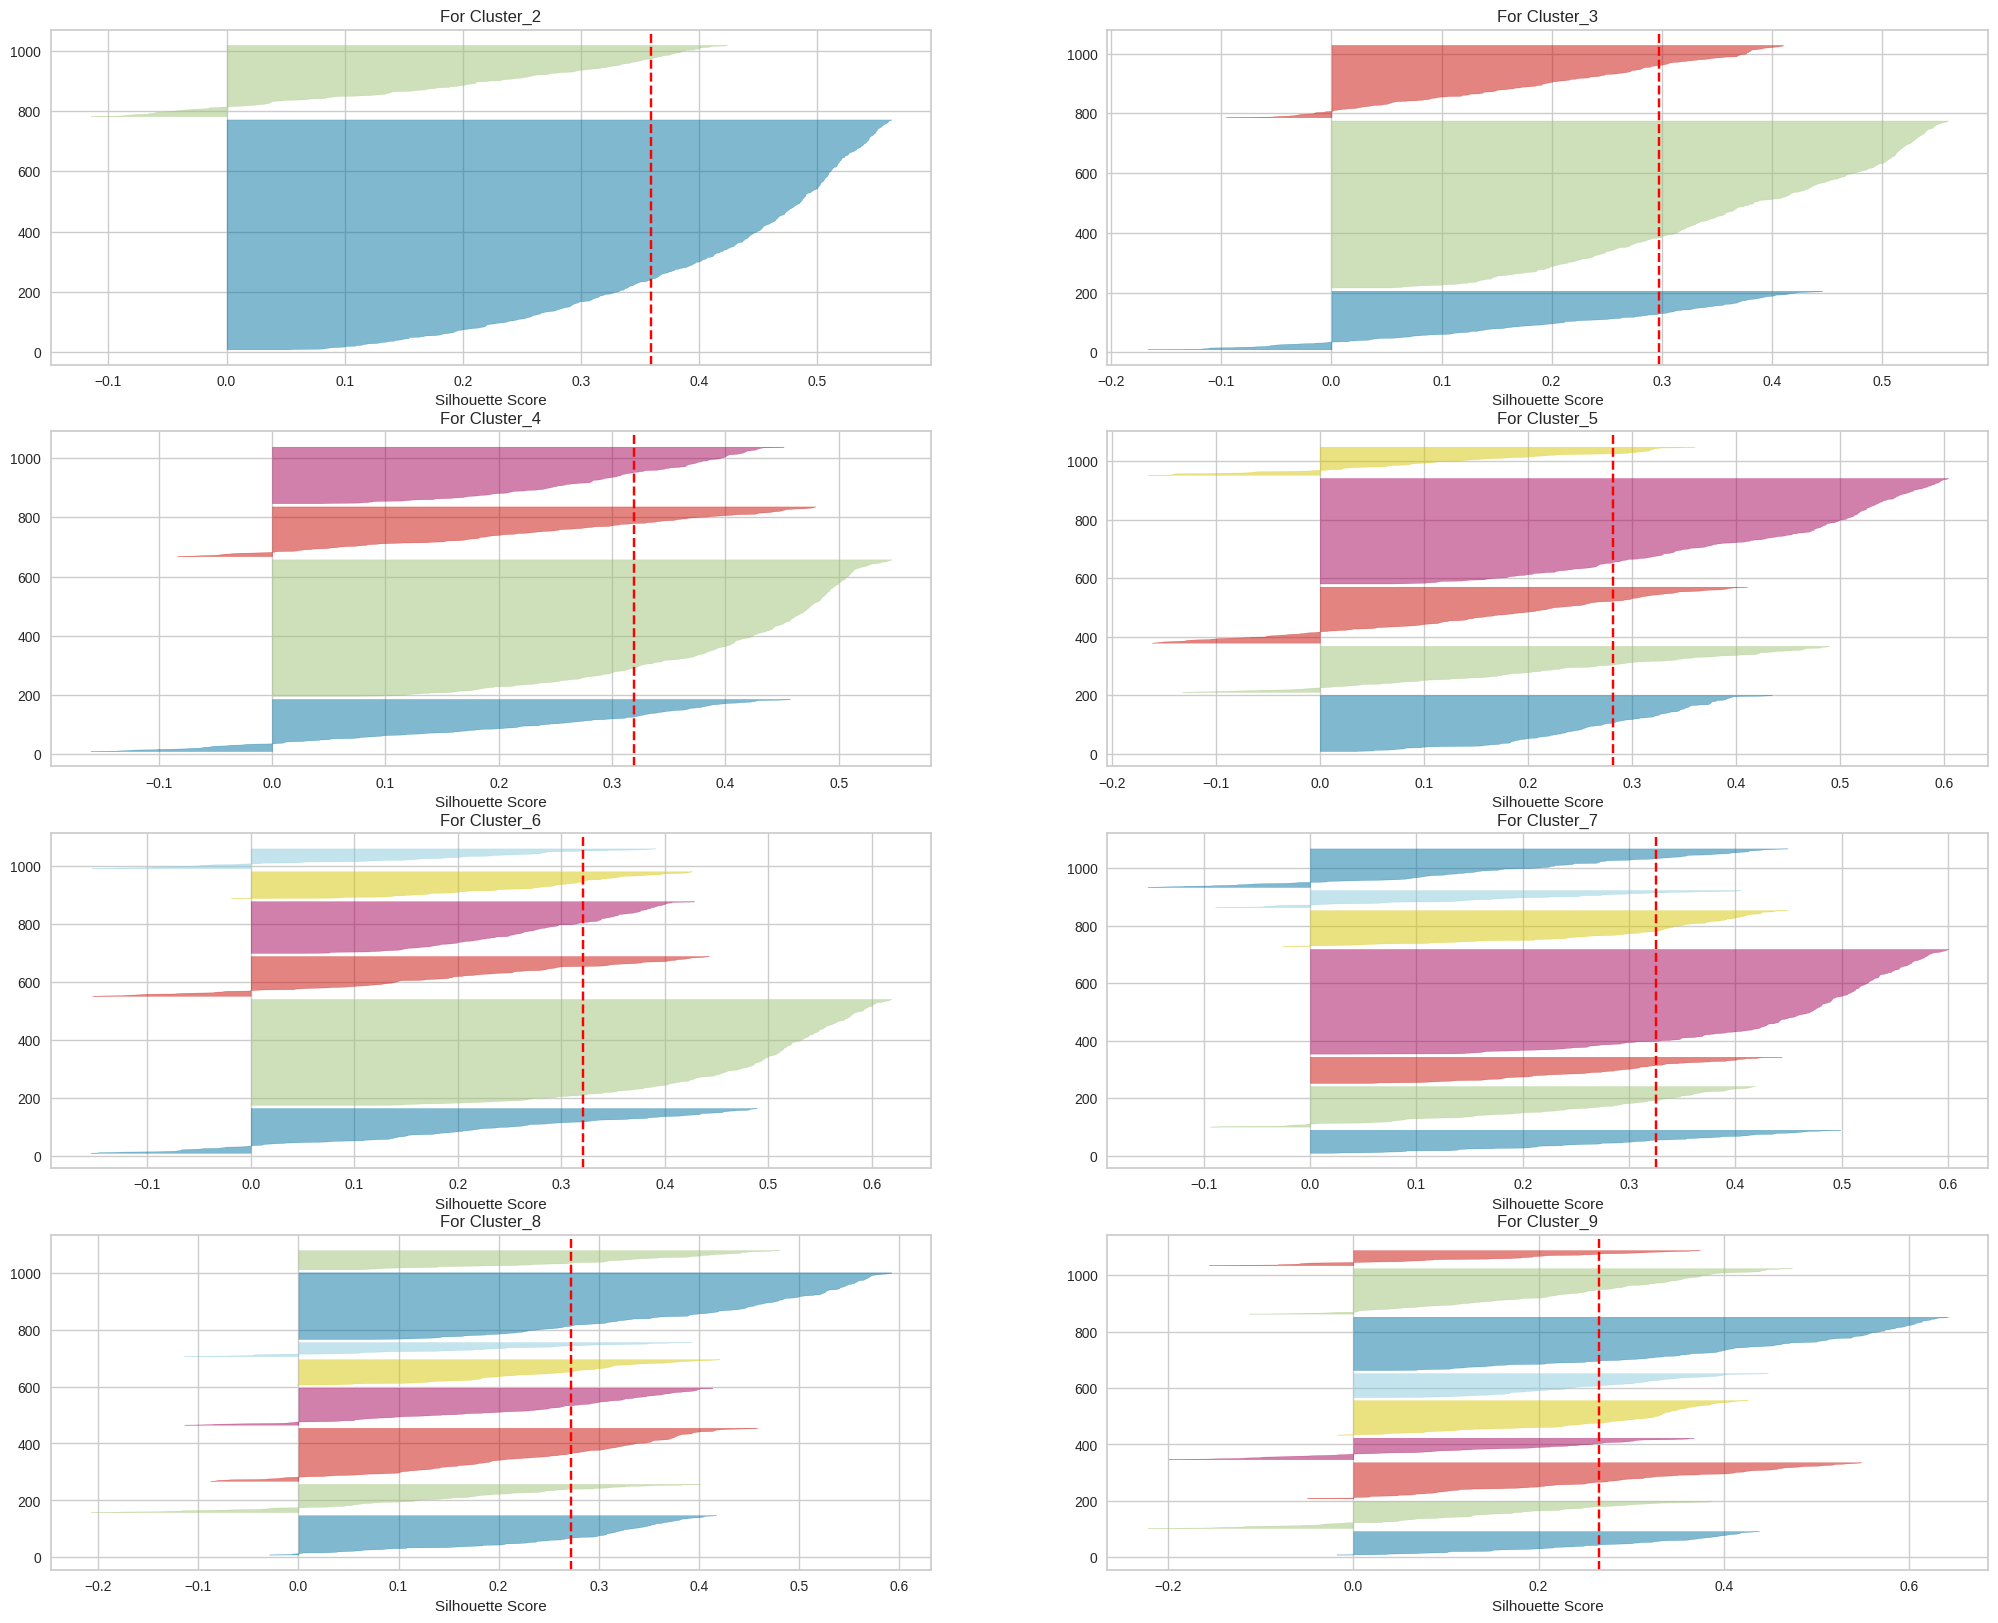

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

fig,ax=plt.subplots(4,2,figsize=(25,20))
for i in range(2,10):
    km=KMeans(n_clusters=i)
    q,r=divmod(i,2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][r])
    visualizer.fit(scaled_credit)
    # visualizer.show() # add this line to show the plot
    ax[q-1][r].set_title('For Cluster_'+str(i))
    ax[q-1][r].set_xlabel('Silhouette Score')



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

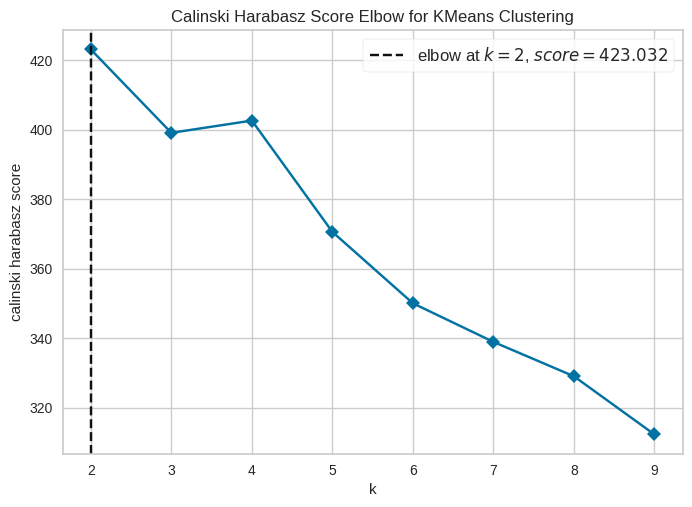

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model, k=(2,10),
metric='calinski_harabasz',
timings=False)
visualizer.fit(scaled_credit)
visualizer.show()

In [ ]:
!pip install git+https://github.com/milesgranger/gap_statistic


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/milesgranger/gap_statistic to /tmp/pip-req-build-mgs_x4mu
  Running command git clone --filter=blob:none --quiet https://github.com/milesgranger/gap_statistic /tmp/pip-req-build-mgs_x4mu
  Resolved https://github.com/milesgranger/gap_statistic to commit d5f8a8ec719fa8c33caa68a957e90feedd80475f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.2-py3-none-any.whl size=6916 sha256=a675342a4656b48c4eadc34e4bf28e9e7b489a719113fd96b7815b837c864adb
  Stored in directory: /tmp/pip-ephem-wheel-cache-6tzwvasv/wheels/de/d5/33/b7abf181822a3380fbea749484094f073993871c2893bdd2f2
Successfully built gap-stat


In [ ]:
from gap_statistic.optimalK import OptimalK


In [ ]:
optimalK=OptimalK(n_jobs=8, parallel_backend='joblib')
n_clusters=optimalK(scaled_credit, cluster_array=np.arange(1,10))

In [ ]:
gap_result=optimalK.gap_df
gap_result.head()

,n_clusters,gap_value,ref_dispersion_std,sk,gap*,sk*,diff,diff*
0,1.0,0.907708,144.404109,0.016824,5915.597021,6832.777929,-0.037861,6606.167440
1,2.0,0.951050,34.531998,0.005481,4462.920198,5153.490616,0.004327,5056.579512
2,3.0,0.961851,81.270018,0.015128,3831.040704,4424.700018,-0.112571,4386.330503
3,4.0,1.092279,83.178913,0.017857,3582.242589,4137.532389,0.073058,4079.473823
4,5.0,1.065917,195.702095,0.046696,3169.093340,3666.324573,0.002232,3637.273954


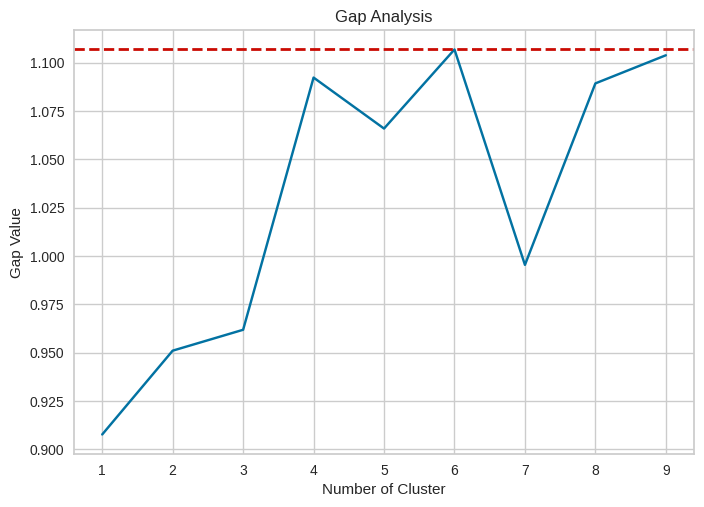

In [ ]:
plt.plot(gap_result.n_clusters, gap_result.gap_value)
min_ylim, max_ylim=plt.ylim()
plt.axhline(np.max(gap_result.gap_value), color='r',
linestyle='dashed', linewidth=2)
plt.title('Gap Analysis')
plt.xlabel('Number of Cluster')
plt.ylabel('Gap Value')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit_predict(scaled_credit)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


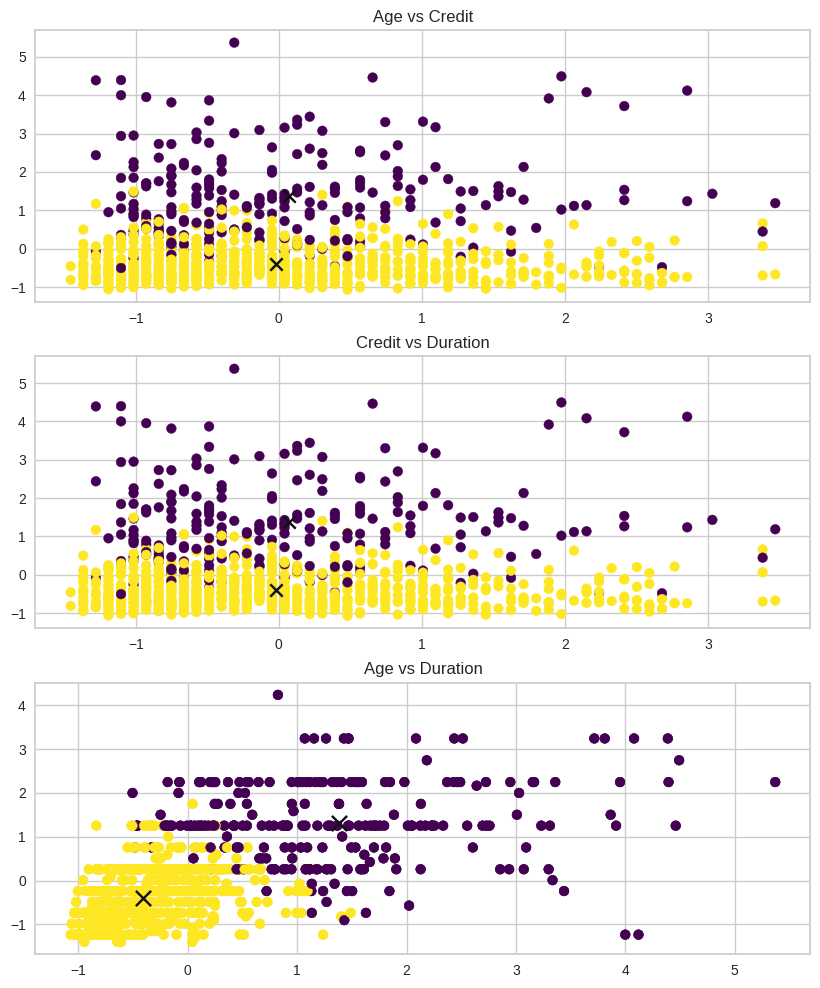

In [ ]:
plt.figure(figsize=(10,12))
plt.subplot(311)
plt.scatter(scaled_credit[:,0], scaled_credit[:,2],
c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],
kmeans.cluster_centers_[:,2], s=80,
marker='x', color='k')
plt.title('Age vs Credit')
plt.subplot(312)
plt.scatter(scaled_credit[:,0], scaled_credit[:,2],
c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],
kmeans.cluster_centers_[:,2], s=80,
marker='x', color='k')
plt.title('Credit vs Duration')
plt.subplot(313)
plt.scatter(scaled_credit[:,2], scaled_credit[:,3],
c=kmeans.labels_, cmap='viridis')
plt.title('Credit vs Duration')
plt.subplot(313)
plt.scatter(scaled_credit[:,2], scaled_credit[:,3],
c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,2],
kmeans.cluster_centers_[:,3], s=120,
marker='x', color='k')
plt.title('Age vs Duration')
plt.show()


In [ ]:
clusters, counts=np.unique(kmeans.labels_, return_counts=True)


In [ ]:
cluster_dict={}
for i in range(len(clusters)):
    cluster_dict[i]=scaled_credit[np.where(kmeans.labels_==i)]


In [ ]:
credit['clusters']=pd.DataFrame(kmeans.labels_)


In [ ]:
df_scaled=pd.DataFrame(scaled_credit)
df_scaled['clusters']=credit['clusters']


In [ ]:
df_scaled['Risk']=credit['Risk']
df_scaled.columns=['Age', 'Job', 'Credit amount', 'Duration', 'Clusters', 'Risk']

In [ ]:
df_scaled[df_scaled.Clusters==0]['Risk'].value_counts()

good    124
bad     105
Name: Risk, dtype: int64

In [ ]:
df_scaled[df_scaled.Clusters==1]['Risk'].value_counts()

good    576
bad     195
Name: Risk, dtype: int64

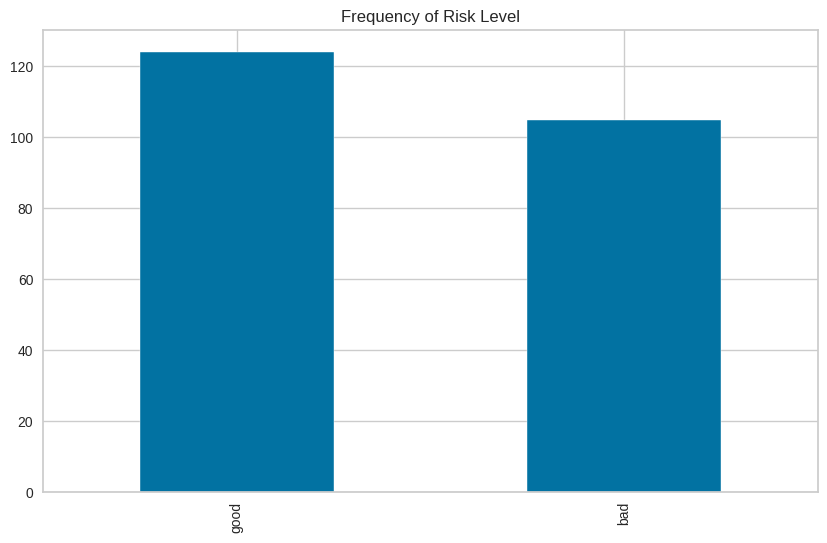

In [ ]:
df_scaled[df_scaled.Clusters==0]['Risk'].value_counts()\
    .plot(kind='bar',
    figsize=(10,6),
    title='Frequency of Risk Level');


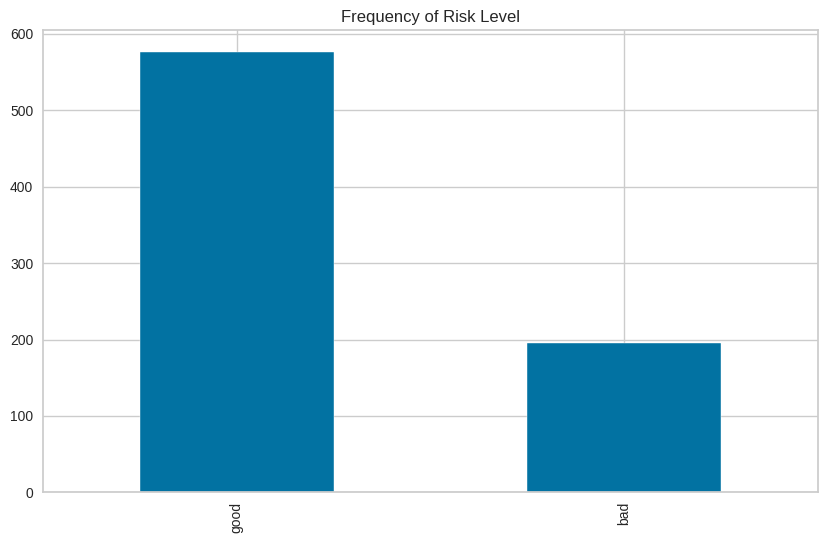

In [ ]:
df_scaled[df_scaled.Clusters==1]['Risk'].value_counts()\
    .plot(kind='bar',
    figsize=(10,6),
    title='Frequency of Risk Level');

In [ ]:
from sklearn.model_selection import train_test_split
df_scaled['Risk']=df_scaled['Risk'].replace({'good':1, 'bad':0})
X=df_scaled.drop('Risk', axis=1)
y=df_scaled.loc[:,['Risk', 'Clusters']]

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
first_cluster_train=X_train[X_train.Clusters==0].iloc[:,:-1]
second_cluster_train=X_train[X_train.Clusters==1].iloc[:,:-1]

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_train1=first_cluster_train
y_train1=y_train[y_train.Clusters==0]['Risk']
smote=SMOTEENN(random_state=2)
X_train1,y_train1=smote.fit_resample(X_train1, y_train1.ravel())
logit=sm.Logit(y_train1, X_train1)
logit_fit1=logit.fit()
print(logit_fit1.summary())


Optimization terminated successfully.
         Current function value: 0.575443
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   49
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            3
Date:                Sun, 02 Apr 2023   Pseudo R-squ.:                  0.1490
Time:                        06:19:43   Log-Likelihood:                -28.197
converged:                       True   LL-Null:                       -33.133
Covariance Type:            nonrobust   LLR p-value:                   0.01968
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age              -0.1496      0.331     -0.452      0.651      -0.798       0.499
Job               1.

In [ ]:
first_cluster_test=X_test[X_test.Clusters==0].iloc[:,:-1]
second_cluster_test=X_test[X_test.Clusters==1].iloc[:,:-1]


In [ ]:
X_test1=first_cluster_test
y_test1=y_test[y_test.Clusters==0]['Risk']
pred_prob1=logit_fit1.predict(X_test1)


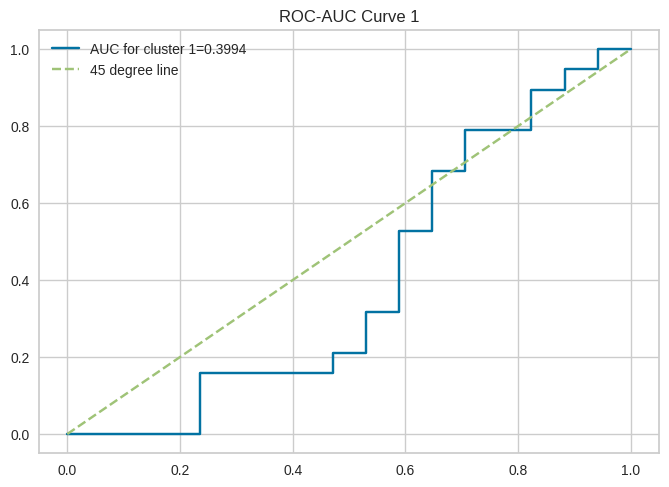

In [ ]:
false_pos, true_pos,_=roc_curve(y_test1.values, pred_prob1)
auc=roc_auc_score(y_test1, pred_prob1)
plt.plot(false_pos, true_pos, label='AUC for cluster 1={:.4f}'.format(auc))
plt.plot([0,1],[0,1], linestyle='--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve 1')
plt.show()

In [ ]:
X_train2=second_cluster_train
y_train2=y_train[y_train.Clusters==1]['Risk']
logit=sm.Logit(y_train2, X_train2)
logit_fit2=logit.fit()
print(logit_fit2.summary())


Optimization terminated successfully.
         Current function value: 0.603080
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   Risk   No. Observations:                  607
Model:                          Logit   Df Residuals:                      603
Method:                           MLE   Df Model:                            3
Date:                Sun, 02 Apr 2023   Pseudo R-squ.:                -0.06818
Time:                        06:19:43   Log-Likelihood:                -366.07
converged:                       True   LL-Null:                       -342.70
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age               0.3933      0.098      4.023      0.000       0.202       0.585
Job              -0.

In [ ]:
X_test2=second_cluster_test
y_test2=y_test[y_test.Clusters==1]['Risk']
pred_prob2=logit_fit2.predict(X_test2)

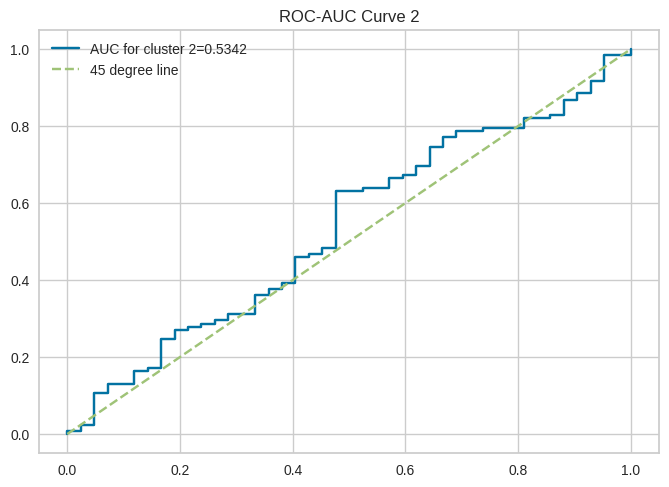

In [ ]:
false_pos, true_pos, _=roc_curve(y_test2.values, pred_prob2)
auc=roc_auc_score(y_test2, pred_prob2)
plt.plot(false_pos, true_pos, label='AUC for cluster 2={:.4f}'
.format(auc))
plt.plot([0,1],[0,1], linestyle='--', label='45 degree line')
plt.legend(loc='best')
plt.title('ROC-AUC Curve 2')
plt.show()

In [ ]:
# !pip install numba

In [ ]:
import pymc as pm 
import arviz as az
# import aesara


In [ ]:
X_train1

,Age,Job,Credit amount,Duration
0,2.414647,0.146949,1.263499,3.243815
1,0.215835,1.677670,3.439781,-0.240857
2,1.535122,1.677670,1.628221,-0.738668
3,-1.015499,0.146949,1.165673,2.248194
4,0.743550,1.677670,3.299067,0.256953
5,-0.927547,0.146949,1.624677,1.252574
6,-0.839594,0.146949,1.757239,1.252574
7,-0.575737,1.677670,2.855659,0.256953
8,-1.103451,1.677670,2.937890,0.256953
9,1.271265,0.146949,1.046580,2.248194


In [ ]:
with pm.Model() as logistic_model1:
    beta_age=pm.Normal('coeff_age', mu=0, sigma=10)
    beta_job=pm.Normal('coeff_job', mu=0, sigma=10)
    beta_credit=pm.Normal('coeff_credit_amount', mu=0, sigma=10)
    beta_dur=pm.Normal('coeff_duration', mu=0, sigma=10)
    p=pm.Deterministic('p', pm.math.sigmoid(beta_age*X_train1['Age']+beta_job*X_train1['Job']+
    beta_credit*X_train1['Credit amount']+beta_dur*X_train1['Duration']))
with logistic_model1:
    observed=pm.Bernoulli('risk', p, observed=y_train1)
    map_estimate=pm.find_MAP()

In [ ]:
param_list=['coeff_age', 'coeff_job', 'coeff_credit_amount', 'coeff_duration']
params={}

for i in param_list:
    params[i]=[np.round(map_estimate[i],6)]

bayesian_params=pd.DataFrame.from_dict(params)
print('The rusult of Bayesian estimation:\n{}'.format(bayesian_params))

The rusult of Bayesian estimation:
   coeff_age  coeff_job  coeff_credit_amount  coeff_duration
0  -0.148026   1.080937            -0.980716        0.918227


In [ ]:
with pm.Model() as logistic_model2:
    beta_age=pm.Normal('coeff_age', mu=0, sigma=10)
    beta_job=pm.Normal('coeff_job', mu=0, sigma=10)
    beta_credit=pm.Normal('coeff_credit_amount', mu=0, sigma=10)
    beta_dur=pm.Normal('coeff_duration', mu=0, sigma=10)
    p=pm.Deterministic('p', pm.math.sigmoid(beta_age*second_cluster_train['Age']+
    beta_job*second_cluster_train['Job']+
    beta_credit*
    second_cluster_train['Credit amount']+
    beta_dur*
    second_cluster_train['Duration']))
with logistic_model2:
    observed=pm.Bernoulli('risk',p, observed=y_train[y_train.Clusters==1]
    ['Risk'])
    map_estimate=pm.find_MAP()

In [ ]:
param_list=['coeff_age', 'coeff_job', 'coeff_credit_amount', 'coeff_duration']
params={}

for i in param_list:
    params[i]=[np.round(map_estimate[i],6)]

bayesian_params=pd.DataFrame.from_dict(params)
print('The rusult of Bayesian estimation:\n{}'.format(bayesian_params))

The rusult of Bayesian estimation:
   coeff_age  coeff_job  coeff_credit_amount  coeff_duration
0    0.39324  -0.060987               -0.674       -0.801389


In [ ]:
import logging 
logger=logging.getLogger('pymc')
logger.setLevel(logging.ERROR)


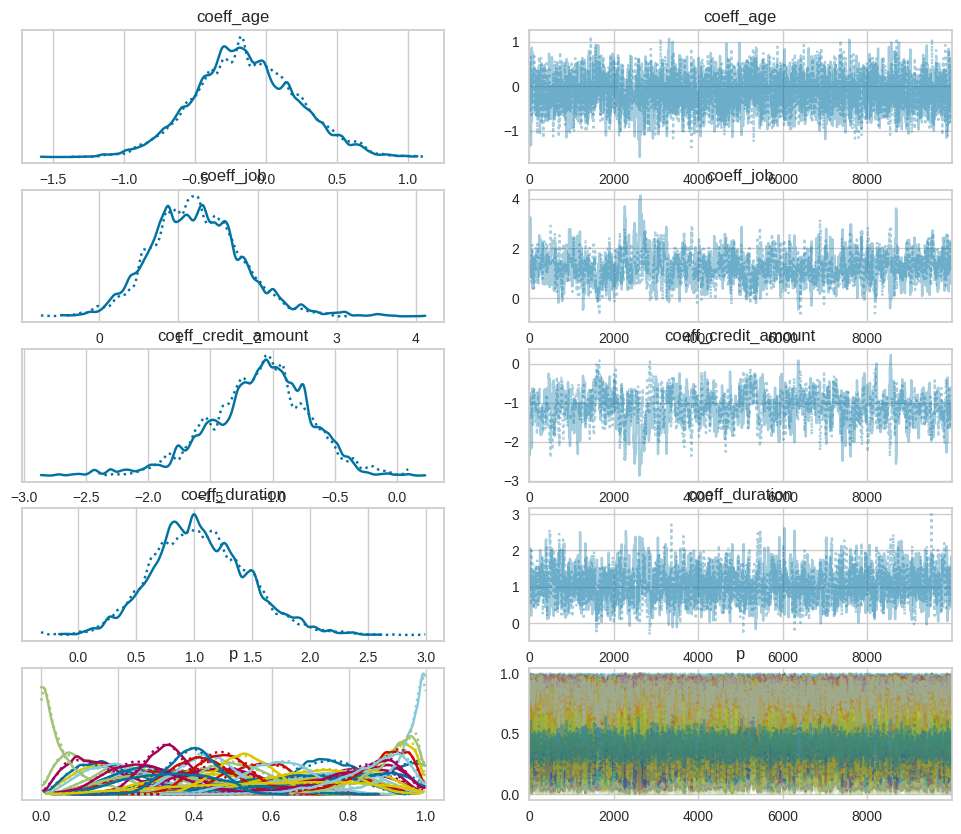

In [ ]:
with logistic_model1:
    step=pm.Metropolis()
    trace=pm.sample(10000, step=step,progressbar=False)
az.plot_trace(trace)
plt.show()


In [ ]:
with logistic_model1:
    display(az.summary(trace, round_to=6)[:4])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
coeff_age,-0.140633,0.356496,-0.796095,0.546026,0.009072,0.006416,1548.007154,2881.109628,1.000948
coeff_job,1.224598,0.562430,0.178945,2.264535,0.032132,0.022742,315.095299,813.019966,1.003266
coeff_credit_amount,-1.104311,0.393207,-1.803447,-0.343143,0.024679,0.017689,284.014445,595.895400,1.003124
coeff_duration,1.049771,0.406866,0.281704,1.809697,0.013310,0.009415,939.504756,1928.417760,1.001132


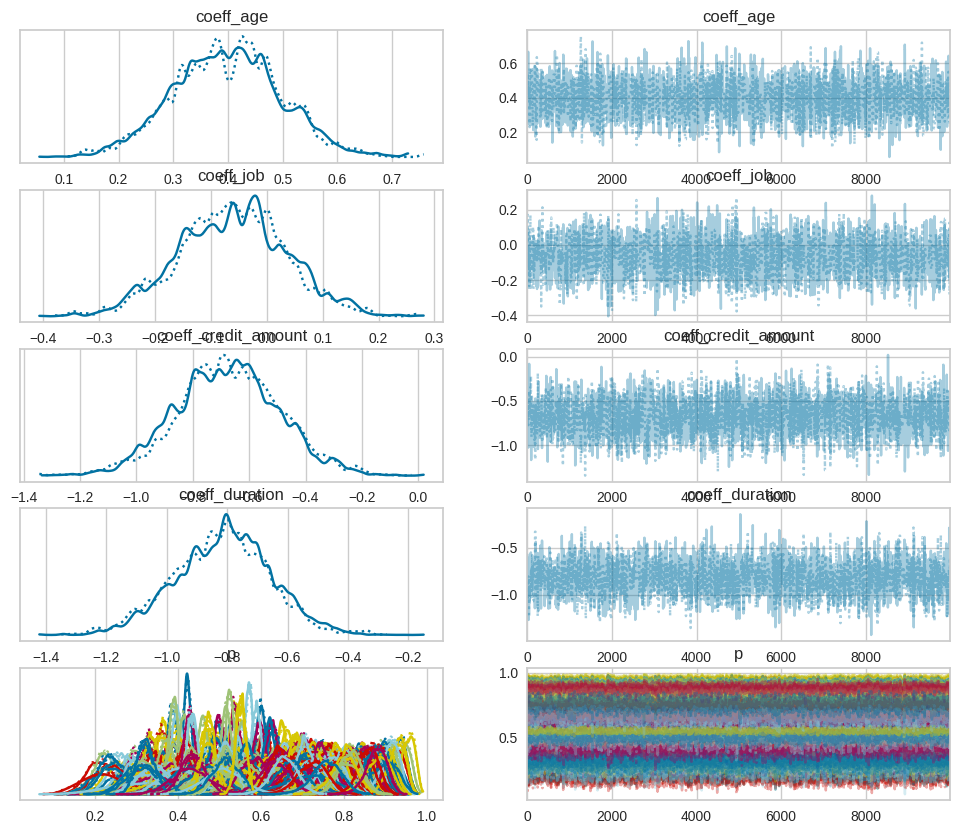

In [ ]:
with logistic_model2:
    step=pm.Metropolis()
    trace=pm.sample(10000, step=step, progressbar=False)
az.plot_trace(trace)
plt.show()
    

In [ ]:
with logistic_model2:
    display(az.summary(trace, round_to=6)[:4])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
coeff_age,0.398580,0.097781,0.214859,0.576138,0.002181,0.001543,2016.186084,2011.814265,1.001075
coeff_job,-0.061460,0.096211,-0.249348,0.110677,0.002249,0.001642,1821.490673,1799.780796,1.001300
coeff_credit_amount,-0.673859,0.181555,-1.029040,-0.337349,0.004449,0.003146,1659.168402,2321.915620,1.002111
coeff_duration,-0.815903,0.158244,-1.129912,-0.540766,0.003883,0.002746,1666.613903,2380.508681,1.001962


In [ ]:
from sklearn.svm import SVC 
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingRandomSearchCV
import time 


In [ ]:
param_svc={'gamma':[1e-6,1e-2],
'C':[0.001,.09, 1,5,10],
'kernel':('linear','rbf')}

In [ ]:
svc=SVC(class_weight='balanced')
halve_SVC=HalvingRandomSearchCV(svc, param_svc, scoring='roc_auc', n_jobs=-1)
halve_SVC.fit(X_train1,y_train1)
print('Best hyperparameters for first cluster in SVC {} with {}'.
format(halve_SVC.best_score_, halve_SVC.best_params_))


Best hyperparameters for first cluster in SVC 0.55 with {'kernel': 'linear', 'gamma': 0.01, 'C': 10}


In [ ]:
y_pred_SVC1=halve_SVC.predict(X_test1)
print('The ROC AUC score of SVC for first cluster is {:.4f}'.
format(roc_auc_score(y_test1, y_pred_SVC1)))

The ROC AUC score of SVC for first cluster is 0.5480


In [ ]:
halve_SVC.fit(X_train2, y_train2)
print('Best hyperparameters for second cluster i SVC {} with {}'.
format(halve_SVC.best_score_, halve_SVC.best_params_))

Best hyperparameters for second cluster i SVC 0.6816086698415201 with {'kernel': 'linear', 'gamma': 0.01, 'C': 10}


In [ ]:
y_pred_SVC2=halve_SVC.predict(X_test2)
print('The ROC AUC score of SVC for first cluster is {:.4f}'.
format(roc_auc_score(y_test2, y_pred_SVC2)))

The ROC AUC score of SVC for first cluster is 0.5234


In [ ]:
from sklearn.ensemble import RandomForestClassifier 


In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_rfc={'n_estimators':[100,300],
'criterion':['gini', 'entropy'],
'max_features':['auto', 'sqrt', 'log2'],
'max_depth':[3,4,5,6],
'min_samples_split':[5,10]}



In [ ]:
halve_RF=HalvingRandomSearchCV(rfc, param_rfc, scoring='roc_auc', n_jobs=-1)
halve_RF.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in RF {} with{}'.
format(halve_RF.best_score_, halve_RF.best_params_))

Best hyperparameters for first cluster in RF 0.6833333333333333 with{'n_estimators': 100, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'entropy'}


In [ ]:
y_pred_RF1=halve_RF.predict(X_test1)
print('The ROC AUC score of Rf for first cluster is {:.4f}'.
format(roc_auc_score(y_test1, y_pred_RF1)))





The ROC AUC score of Rf for first cluster is 0.5387


In [ ]:
halve_RF.fit(X_train2, y_train2)
print('Best hyperparameters for second cluster in RF {} with {}'.
format(halve_RF.best_score_, halve_RF.best_params_))


Best hyperparameters for second cluster in RF 0.6402179017205937 with {'n_estimators': 300, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 3, 'criterion': 'gini'}


In [ ]:
y_pred_RF2=halve_RF.predict(X_test2)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
format(roc_auc_score(y_test2, y_pred_RF2)))

The ROC AUC score of RF for first cluster is 0.5000


In [ ]:
from sklearn.neural_network import MLPClassifier 


In [ ]:
param_NN={
    'hidden_layer_sizes':[(100, 50), (50,50), (10,100)],
'solver':['lbfgs', 'sgd', 'adam'],
'learning_rate_init':[0.001, 0.05]}

In [ ]:
MLP=MLPClassifier(random_state=42)


In [ ]:
param_halve_NN=HalvingRandomSearchCV(MLP, param_NN, scoring='roc_auc')
param_halve_NN.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in NN are {}'.
format(param_halve_NN.best_params_))

Best hyperparameters for first cluster in NN are {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 50)}


In [ ]:
y_pred_NN1=param_halve_NN.predict(X_test1)
print('The ROC AUC score of NN for first cluster is {:.4f}'.
format(roc_auc_score(y_test1, y_pred_NN1)))


The ROC AUC score of NN for first cluster is 0.5774


In [ ]:
param_halve_NN.fit(X_train2, y_train2)
print('Best hyperparameters for first cluster in NN are {}'.
format(param_halve_NN.best_params_))

Best hyperparameters for first cluster in NN are {'solver': 'sgd', 'learning_rate_init': 0.05, 'hidden_layer_sizes': (100, 50)}


In [ ]:
y_pred_NN2=param_halve_NN.predict(X_test2)
print('The ROC AUC score of NN for first cluster is {:.4f}'.format(roc_auc_score(y_test2, y_pred_NN2)))

The ROC AUC score of NN for first cluster is 0.5275


In [ ]:
from tensorflow import keras 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 
from tensorflow.keras.layers import Dense, Dropout 
from sklearn.model_selection import GridSearchCV 
import tensorflow as tf 
import logging 
tf.get_logger().setLevel(logging.ERROR)


In [ ]:
def DL_risk(dropout_rate, verbose=0):
    model=keras.Sequential()
    model.add(Dense(128, kernel_initializer='normal',
    activation='relu', input_dim=4))
    model.add(Dense(64, kernel_initializer='normal',
    activation='relu'))
    model.add(Dense(8,kernel_initializer='normal',
    activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop')
    return model 

In [ ]:
parameters={
    'batch_size': [10,50,100],
    'epochs':[50,100,150],
    'dropout_rate':[0.2,0.4]
}
model=KerasClassifier(build_fn=DL_risk)
gs=GridSearchCV(estimator=model,
param_grid=parameters,
scoring='roc_auc')


In [ ]:
gs.fit(X_train1, y_train1, verbose=0)
print('Best hyperparameters for first cluster in DL are {}'.
format(gs.best_params_))

1/1 [==============================] - 0s 57ms/step
Best hyperparameters for first cluster in DL are {'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 50}


In [ ]:
model=KerasClassifier(build_fn=DL_risk,
dropout_rate=gs.best_params_['dropout_rate'],
verbose=0,
batch_size=gs.best_params_['batch_size'],
epochs=gs.best_params_['epochs'])
model.fit(X_train1, y_train1)
DL_predict1=model.predict(X_test1)
DL_ROC_AUC=roc_auc_score(y_test1, pd.DataFrame(DL_predict1.flatten()))
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))

2/2 [==============================] - 0s 7ms/step
DL_ROC_AUC is 0.5743


In [ ]:
gs.fit(X_train2.values, y_train2.values, verbose=0)
print('Best parameters for second cluster in DL are {}'.
format(gs.best_params_))





4/4 [==============================] - 0s 3ms/step
Best parameters for second cluster in DL are {'batch_size': 100, 'dropout_rate': 0.4, 'epochs': 50}


In [164]:
model=KerasClassifier(build_fn=DL_risk,
dropout_rate=gs.best_params_['dropout_rate'],
verbose=0,
batch_size=gs.best_params_['batch_size'],
epochs=gs.best_params_['epochs'])
model.fit(X_train2, y_train2)
DL_predict2=model.predict(X_test2)
DL_ROC_AUC=roc_auc_score(y_test2,DL_predict2.flatten())
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))

2/2 [==============================] - 0s 5ms/step
DL_ROC_AUC is 0.6099
